In [2]:
# importing the libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the cars dataset from a csv file:

df_cars = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [4]:
# checking the imported database:

df_cars.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2C4RC1N71H,Kitsap,Bremerton,WA,98311.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,23.0,349437882,POINT (-122.6466274 47.6341188),PUGET SOUND ENERGY INC,5.303509e+10
1,2C4RC1N7XL,Stevens,Colville,WA,99114.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,7.0,154690532,POINT (-117.90431 48.547075),AVISTA CORP,5.306595e+10
2,KNDC3DLCXN,Yakima,Yakima,WA,98908.0,2022,KIA,EV6,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,14.0,219969144,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA0J,Kitsap,Bainbridge Island,WA,98110.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,23.0,476786887,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10
4,1N4AZ1CP7J,Thurston,Tumwater,WA,98501.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,35.0,201185253,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [57]:
df_cars.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

# Creating a year list, line chart and bar chart

In [5]:
df_cars['Model Year'].min()

1997

In [6]:
df_cars['Model Year'].max()

2024

In [7]:
# creating a list of year range for plotting purposes. This would not be really useful for this dataset, BUT GENERALLY; IT IS A GREAT FEATURE FOR CONTINUOUS VALUES.
# take care for n-1 as it is a range of dates

years = list(map(str, range(1997, 2025)))
years

['1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024']

In [68]:
# creating a df for the change of maximum electric range over model year
# --> in total, sharp increase between 1997-2020

df_max = df_cars.groupby('Model Year')[['Electric Range']].max()
df_max

,Electric Range
Model Year,
1997,39
1998,58
1999,74
2000,58
2002,95
2003,95
2008,220
2010,245
2011,245


(1997.0, 2020.0)

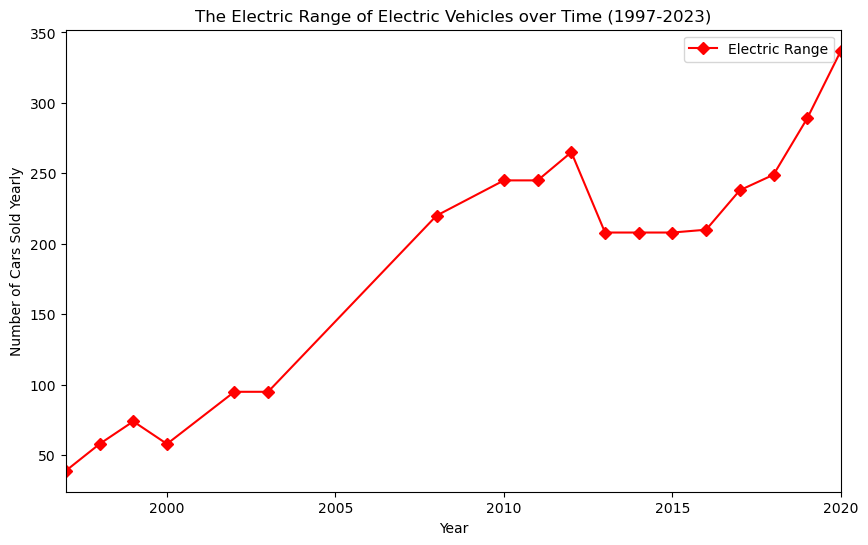

In [64]:
# plotting this as a line plot until 2020
# of course, a line is only for representation purposes, is does not show a continuous trend!


df_max.plot(kind = 'line',
                 figsize = (10,6),
                 color = 'red',
                 marker = 'D')
plt.title('The Electric Range of Electric Vehicles over Time (1997-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold Yearly')
plt.xlim(1997,2020)

Text(0, 0.5, 'Manufacturer')

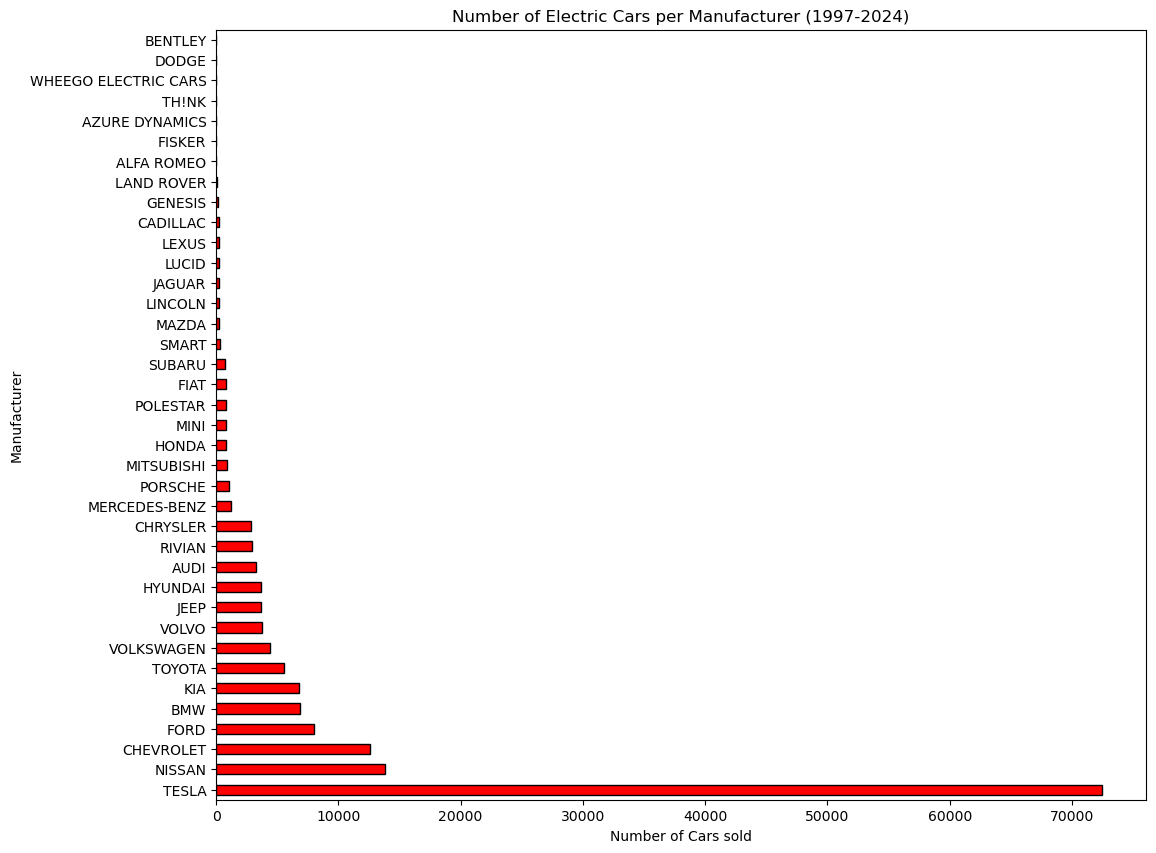

In [10]:
# create a bar chart for the make:

df_make = df_cars['Make'].value_counts()

df_make.plot(kind = 'barh', figsize = (12,10), color = 'red', edgecolor = 'black')
plt.title('Number of Electric Cars per Manufacturer (1997-2024)')
plt.xlabel('Number of Cars sold')
plt.ylabel('Manufacturer')

Text(0, 0.5, 'Manufacturer')

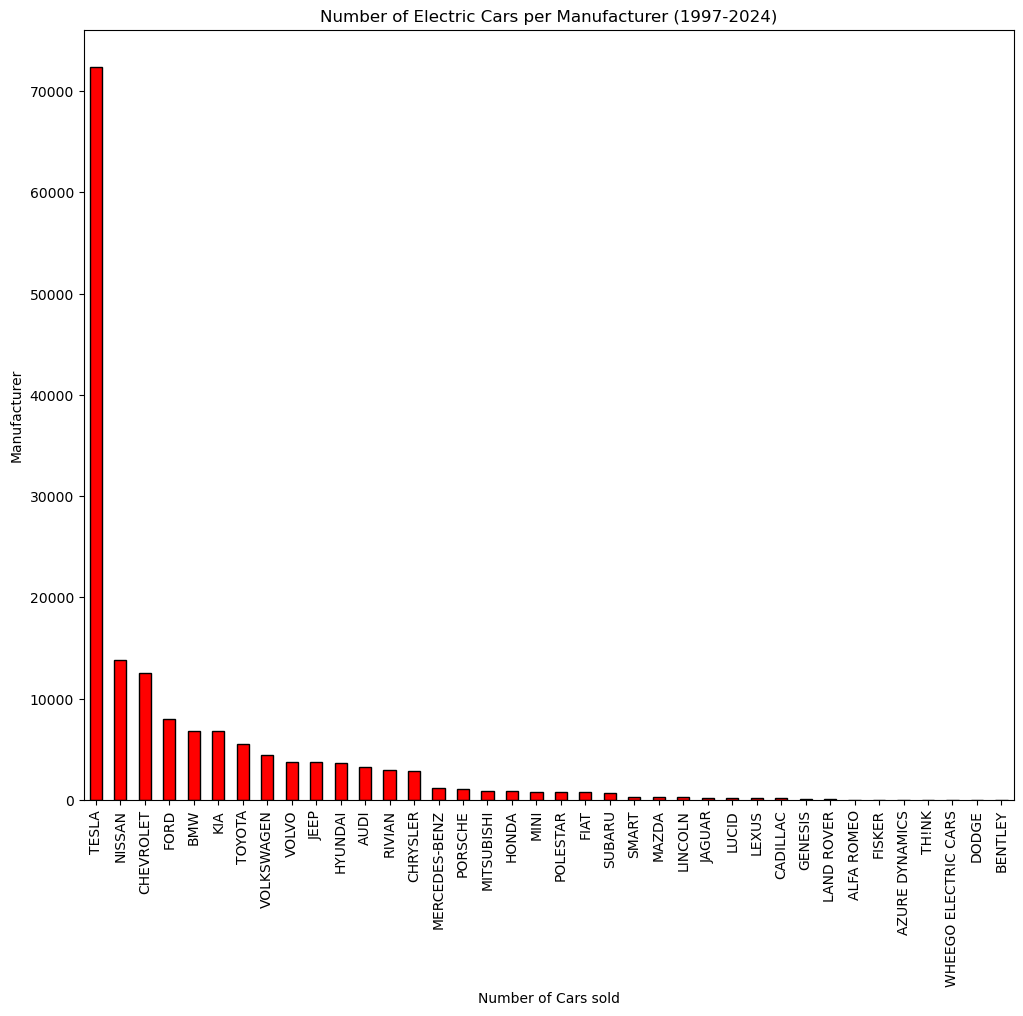

In [11]:
# create a vertical bar chart for the make:

df_make = df_cars['Make'].value_counts()

df_make.plot(kind = 'bar', figsize = (12,10), color = 'red', edgecolor = 'black')
plt.title('Number of Electric Cars per Manufacturer (1997-2024)')
plt.xlabel('Number of Cars sold')
plt.ylabel('Manufacturer')

# Pie chart and box plots

In [12]:
df_cars['Model Year'].value_counts()
# THIS WILL BE SUPER UGLY ON A PIE CHART:
# AS IT IS SPLITTED TO >20 PARTS--> ONLY FOR REPRESENTATION PURPOSE!!

Model Year
2023    45244
2022    27680
2021    18737
2018    14328
2020    11394
2019    10730
2017     8576
2016     5604
2015     4897
2013     4516
2014     3561
2024     1714
2012     1645
2011      780
2010       24
2008       21
2000        8
1999        3
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64

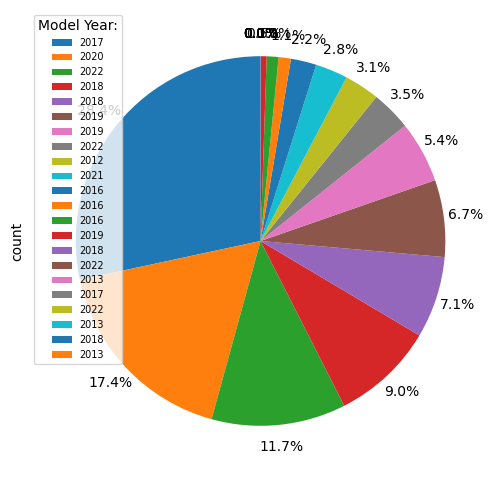

In [13]:
# pie chart for the year distibution:
# NOTE: THIS IS SUPER UGLY; ONLY FOR REPRESENTATION PURPOSE
# NEVER MAKE SUCH A PIE CHART :) 

df_cars['Model Year'].value_counts().plot(kind = 'pie',
                           figsize = (20,6),
                           autopct = '%1.1f%%', # adding percentage
                           startangle = 90, # start at 90°
                           labels = None,
                           pctdistance = 1.12,
                           labeldistance = .6
                          )

plt.legend(title = 'Model Year:', labels= df_cars['Model Year'], loc='upper left', fontsize=7)
plt.show()

Text(0, 0.5, 'Model Year')

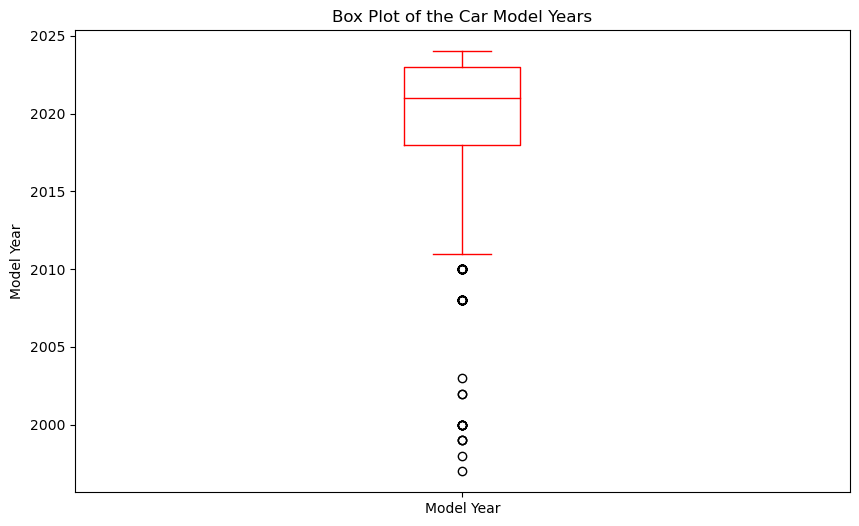

In [18]:
# Box plot for the model years:

df_cars['Model Year'].plot (kind = 'box',
                            figsize = (10,6),
                            color = 'red')
plt.title('Box Plot of the Car Model Years')
plt.ylabel('Model Year')